### 2. Работа с несколькими источниками

In [1]:
import pandas as pd
data=pd.read_csv(r'C:\Users\stazher3\Downloads\Yandex.Disk.Files\3\01 Исследовательский анализ данных\visits.csv',sep='\t')

# фильтруем слишком быстрые и медленные заезды и АЗС
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000
too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000').reset_index()

# считаем данные по отдельным АЗС и по сетям
station_stat = data.pivot_table(index='id', values='time_spent', aggfunc='median').reset_index()
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median').reset_index()
stat = data.pivot_table(index='name', values='time_spent').reset_index()
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median').reset_index()
stat['good_time_spent'] = good_stat['time_spent']


id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count']).reset_index()
id_name.columns = ['id','name','count']

# print(id_name.head(5))
# print(id_name.columns)
# print(good_stations_stat.columns)
# print()
# print(type(id_name['id'].dtype))
# print(type(good_stations_stat['id'].dtype))
id_name['id'] = id_name['id'].astype(str)
good_stations_stat['id'] = good_stations_stat['id'].astype(str)
station_stat_full = id_name.merge(good_stations_stat,on='id', how='left')
# print(data)
# print()
station_stat_multi = data.pivot_table(index='id',values=['time_spent','too_fast','too_slow'],aggfunc='mean').reset_index()
# print(station_stat_multi,'\n',station_stat_multi.corr())
print(good_stations_stat.head(5))
# print(good_stat.head(5))
# print(station_stat.columns)
# print(station_stat.head(5))
# print(good_stations_stat.columns,'\n',good_stations_stat.head(5))

         id  time_spent
0  00ca1b70       166.0
1  0178ce70       234.5
2  01abf4e9       181.5
3  030a9067       135.5
4  03740f2d       289.0


In [2]:
station_stat_multi['good_time_spent'] = good_stations_stat['time_spent']
print(station_stat_multi.dtypes)
print(station_stat_multi.drop('id',axis=1).corr())

id                  object
time_spent         float64
too_fast           float64
too_slow           float64
good_time_spent    float64
dtype: object
                 time_spent  too_fast  too_slow  good_time_spent
time_spent         1.000000 -0.640658  0.802247        -0.007098
too_fast          -0.640658  1.000000 -0.255876         0.009623
too_slow           0.802247 -0.255876  1.000000         0.002967
good_time_spent   -0.007098  0.009623  0.002967         1.000000


array([[<Axes: xlabel='time_spent', ylabel='time_spent'>,
        <Axes: xlabel='too_fast', ylabel='time_spent'>,
        <Axes: xlabel='too_slow', ylabel='time_spent'>,
        <Axes: xlabel='good_time_spent', ylabel='time_spent'>],
       [<Axes: xlabel='time_spent', ylabel='too_fast'>,
        <Axes: xlabel='too_fast', ylabel='too_fast'>,
        <Axes: xlabel='too_slow', ylabel='too_fast'>,
        <Axes: xlabel='good_time_spent', ylabel='too_fast'>],
       [<Axes: xlabel='time_spent', ylabel='too_slow'>,
        <Axes: xlabel='too_fast', ylabel='too_slow'>,
        <Axes: xlabel='too_slow', ylabel='too_slow'>,
        <Axes: xlabel='good_time_spent', ylabel='too_slow'>],
       [<Axes: xlabel='time_spent', ylabel='good_time_spent'>,
        <Axes: xlabel='too_fast', ylabel='good_time_spent'>,
        <Axes: xlabel='too_slow', ylabel='good_time_spent'>,
        <Axes: xlabel='good_time_spent', ylabel='good_time_spent'>]],
      dtype=object)

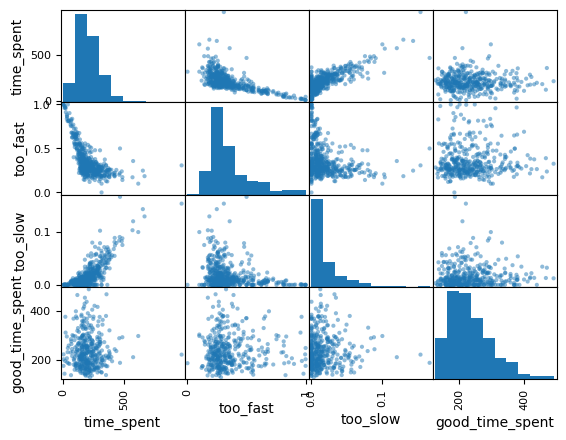

In [3]:
pd.plotting.scatter_matrix(station_stat_multi)

* Построение точечной диаграммы (диаграммы рассеяния):
`data.plot(x='column_x', y='column_y', kind='scatter')`
* Коэффициент корреляции Пирсона между всеми парами столбцов
`data.corr()`

Index(['name', 'time_spent', 'good_time_spent'], dtype='object')
       name  time_spent  good_time_spent
0  Агератум  337.802721            309.0
1   Амарант  132.760012            187.5
2  Аммобиум  256.708042            180.5
3  Арктотис   73.879984            185.0
4  Астильба  376.143149            423.0
       name  time_spent  good_time_spent  median_time  stations
0  Агератум  337.802721            309.0       308.50       3.0
1   Амарант  132.760012            187.5       169.00       5.0
2  Аммобиум  256.708042            180.5       178.75       4.0
3  Арктотис   73.879984            185.0       190.50       3.0
4  Астильба  376.143149            423.0       435.50       4.0


<Axes: xlabel='name'>

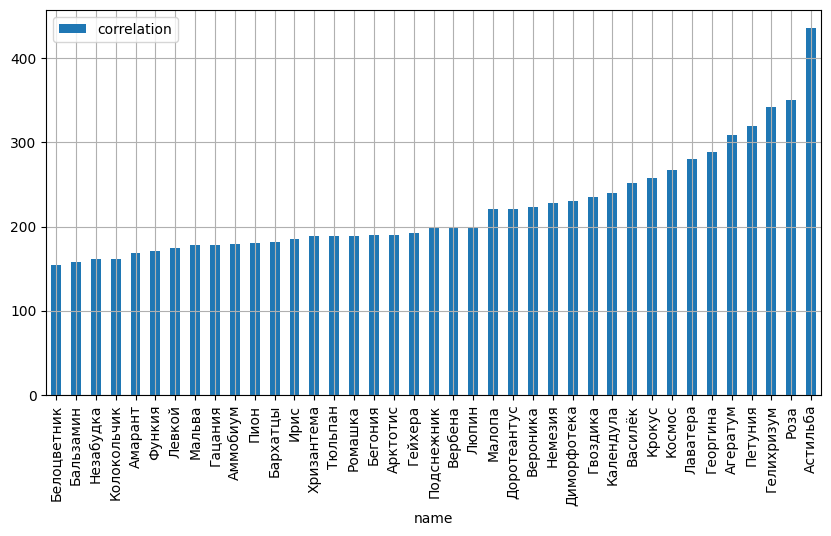

In [4]:
good_stat2 = (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='name', values='time_spent', aggfunc=['median', 'count'])
).reset_index()

good_stat2.columns =['name','median_time', 'stations']
print(stat.columns)
print(stat.head(5))
# print(good_stat2.columns)
# print(good_stat2.head(5))
final_stat = stat.merge(good_stat2, on='name',how='left')
# print(final_stat.columns)
# print(final_stat.head(5))
print(final_stat.head(5))

final_stat.dropna(subset='median_time').sort_values('median_time',ascending=True).plot(
    kind='bar',
    x='name',
    y='median_time',
    label='correlation',
    figsize=(10,5),
    grid=True
)

<Axes: >

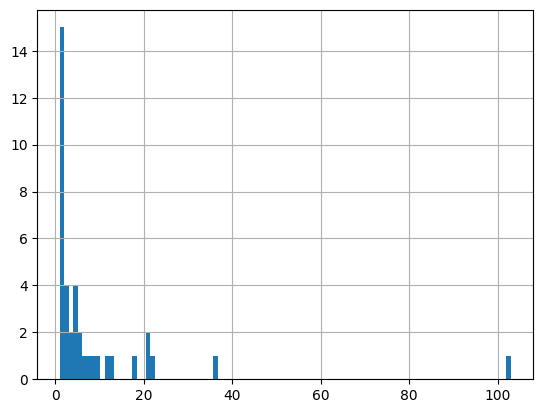

In [5]:
final_stat['stations'].hist(bins=100)

Index(['name', 'time_spent', 'good_time_spent', 'median_time', 'stations'], dtype='object')
          name  time_spent  good_time_spent  median_time  stations
0      Василёк  268.849897            264.0        252.0     103.0
1      Гейхера  167.445947            204.0        192.0      12.0
2    Календула  207.357323            161.0        240.0      36.0
3  Колокольчик  119.131564            267.0        161.0      21.0
4        Люпин  235.440937            182.0        200.0      13.0
             time_spent  good_time_spent  median_time  stations
name                                                           
Василёк      268.849897            264.0       252.00     103.0
Гейхера      167.445947            204.0       192.00      12.0
Календула    207.357323            161.0       240.00      36.0
Колокольчик  119.131564            267.0       161.00      21.0
Люпин        235.440937            182.0       200.00      13.0
Мальва       136.562234            226.0       177.75     

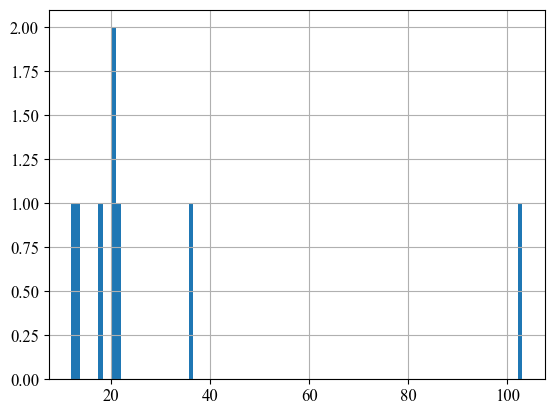

In [13]:
big_nets_stat = final_stat.query('stations>10').reset_index(drop=True)
big_nets_stat['stations'].hist(bins=100)

print(big_nets_stat.columns)
# print(big_nets_stat['name'].unique())
print(big_nets_stat.head(5))

# Let's change the index so we use it as a coller to DF
big_nets_stat = big_nets_stat.set_index('name')
print(big_nets_stat)

In [7]:
station_stat_full['group_name'] = station_stat_full['name'].where(station_stat_full['name'].isin(big_nets_stat.index),'Другие')
print(station_stat_full.head())

         id         name  count  time_spent   group_name
0  00ca1b70     Вероника    131       166.0       Другие
1  0178ce70      Василёк    164       234.5      Василёк
2  01abf4e9      Гацания     30       181.5       Другие
3  030a9067  Колокольчик    228       135.5  Колокольчик
4  03740f2d      Василёк    157       289.0      Василёк


In [8]:
stat_grouped = (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='group_name', values='time_spent', aggfunc=['median', 'count'])
).reset_index()
stat_grouped.columns = ['group_name','time_spent','count']
stat_grouped = stat_grouped.sort_values(by='time_spent',ascending=True).set_index('group_name')
print(stat_grouped)

             time_spent  count
group_name                    
Колокольчик      161.00     21
Мальва           177.75     22
Гейхера          192.00     12
Люпин            200.00     13
Другие           208.75    104
Немезия          227.50     21
Календула        240.00     36
Василёк          252.00    103
Роза             350.00     18


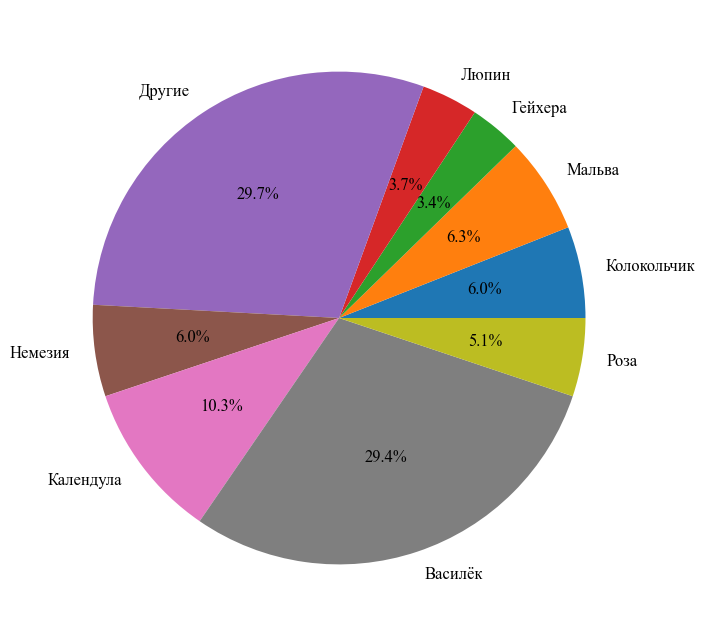

In [9]:
import matplotlib.pyplot as plt

# Changing the font parameters
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size' :12,
})

# Building the pie
plot = stat_grouped.plot(
    kind='pie',
    y='count',
    x='group_name',
    figsize=(8,8),
    autopct='%1.1f%%',
    )
# Remove the y-label
plot.set_ylabel('')
# Remove the legend
plot.legend().set_visible(False)
plt.show
plt.savefig(r'C:\Users\stazher3\Desktop\my_plot.png')

In [18]:
# Basis
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000
too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

# Action
good_data['group_name'] = good_data['name'].where(good_data['name'].isin(big_nets_stat.index),'Другие')
print(big_nets_stat.tail(15))
# print(big_nets_stat['name'].unique())
print(good_data.head(15))
print(good_data['name'].unique())

             time_spent  good_time_spent  median_time  stations
name                                                           
Василёк      268.849897            264.0       252.00     103.0
Гейхера      167.445947            204.0       192.00      12.0
Календула    207.357323            161.0       240.00      36.0
Колокольчик  119.131564            267.0       161.00      21.0
Люпин        235.440937            182.0       200.00      13.0
Мальва       136.562234            226.0       177.75      22.0
Немезия      186.535207            218.5       227.50      21.0
Роза         260.877217            188.0       350.00      18.0
          date_time        id  time_spent     name  too_fast  too_slow  \
0   20180406T165358  76144fb2        98.0  Василёк     False     False   
2   20180403T172824  76144fb2       220.0  Василёк     False     False   
6   20180402T082321  76144fb2       555.0  Василёк     False     False   
7   20180407T003408  76144fb2       286.0  Василёк     False    

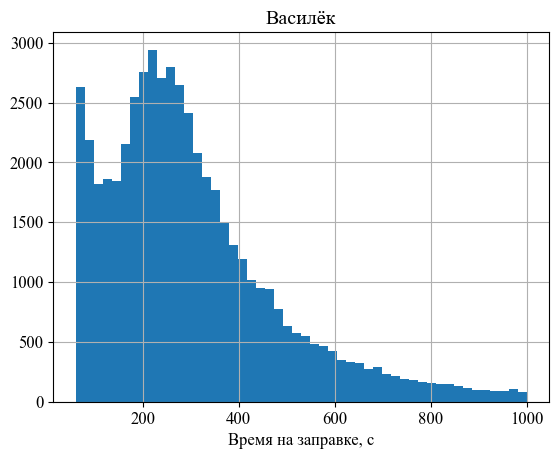

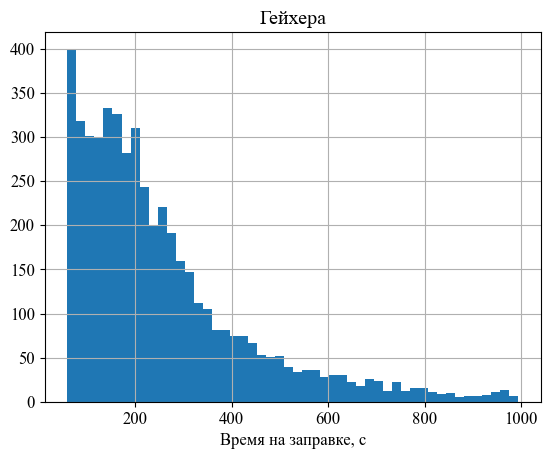

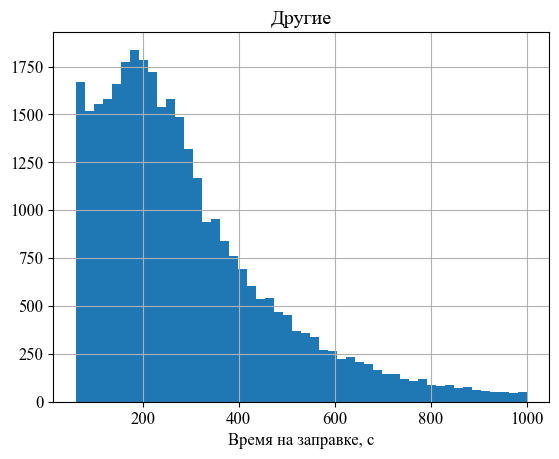

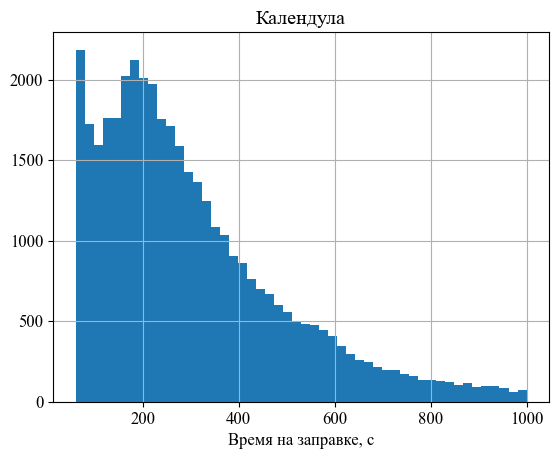

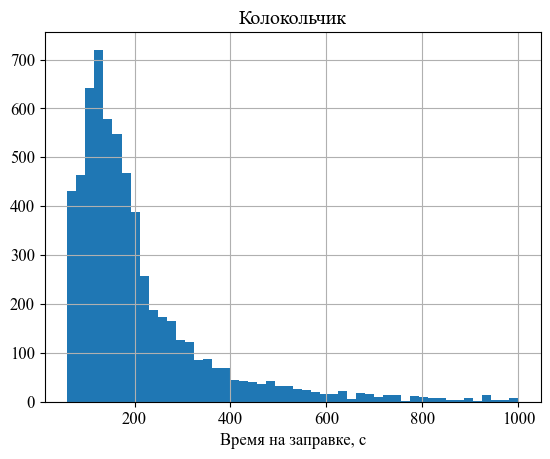

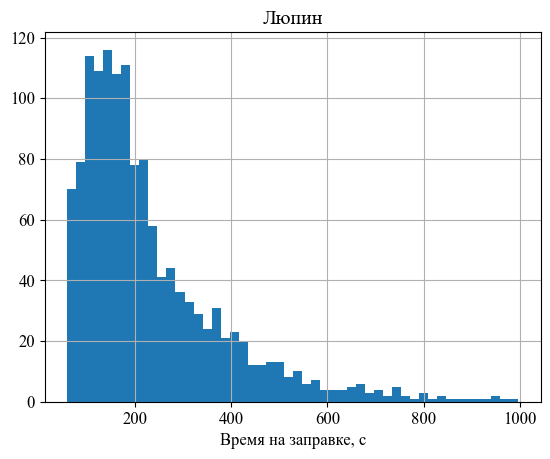

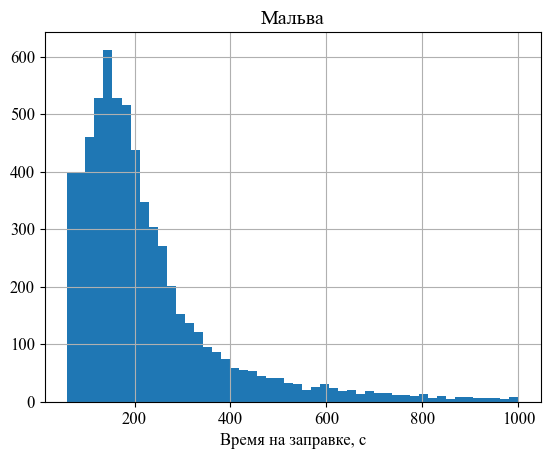

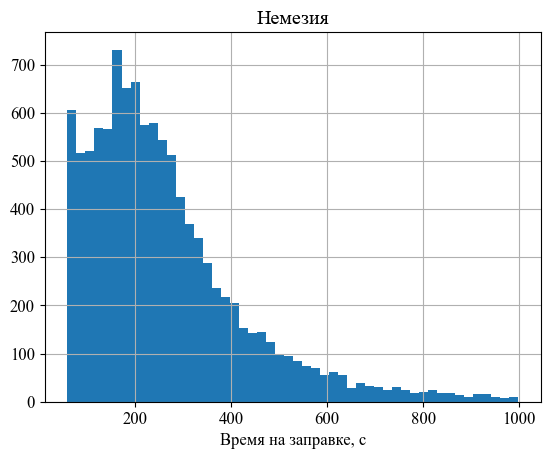

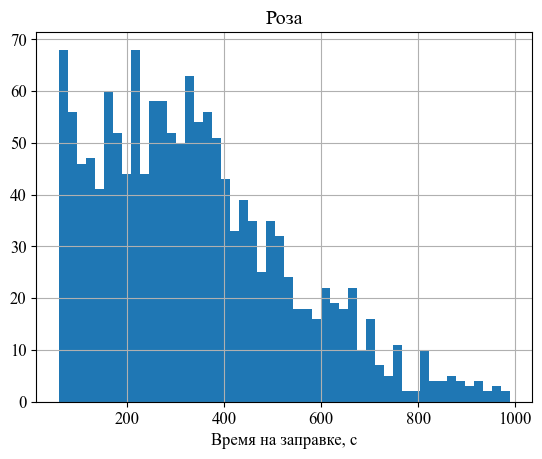

In [30]:
import matplotlib.pyplot as plt
for group_name, good_group_data in good_data.groupby('group_name'):
    good_group_data['time_spent'].hist(bins=50)
    plt.title(f'{group_name}')
    plt.xlabel('Время на заправке, c')
    plt.show()